In [2]:
import pandas as pd
data = pd.read_csv("collegePlace.csv")

In [3]:
data.shape

(2966, 8)

In [4]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [5]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [16]:
cols=['Age', 'CGPA', 'Hostel', 'HistoryOfBacklogs']
X=data[cols]
y=data['PlacedOrNot']
X.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   CGPA               2966 non-null   int64
 2   Hostel             2966 non-null   int64
 3   HistoryOfBacklogs  2966 non-null   int64
dtypes: int64(4)
memory usage: 92.8 KB


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_train)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 1748 to 2267
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2372 non-null   int64
 1   CGPA               2372 non-null   int64
 2   Hostel             2372 non-null   int64
 3   HistoryOfBacklogs  2372 non-null   int64
dtypes: int64(4)
memory usage: 92.7 KB


In [19]:
scaled = scaler.fit_transform(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 2381 to 1021
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                594 non-null    int64
 1   CGPA               594 non-null    int64
 2   Hostel             594 non-null    int64
 3   HistoryOfBacklogs  594 non-null    int64
dtypes: int64(4)
memory usage: 23.2 KB


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'.
format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7929


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       252
           1       0.92      0.70      0.80       342

    accuracy                           0.79       594
   macro avg       0.81      0.81      0.79       594
weighted avg       0.83      0.79      0.79       594



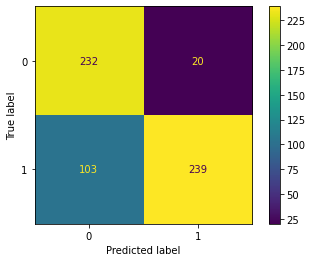

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()